## Plot eval loss

In [30]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [31]:
# Read the data

model = 'gpt2'
filename = f'{model}_eval_clean.csv'
eval_losses = pd.read_csv(filename)
eval_losses

,epoch,gpt2-config1-fien-interleaved,gpt2-config1-deen-interleaved,gpt2-config2-fien-interleaved,gpt2-config2-deen-interleaved,gpt2-config3-fien-interleaved,gpt2-config3-deen-interleaved,gpt2-config1-de-sequential-1,gpt2-config1-deen-sequential-2,gpt2-config1-fi-sequential-1,gpt2-config1-fien-sequential-2,gpt2-config2-fi-sequential-1,gpt2-config2-deen-sequential-2,gpt2-config2-de-sequential-1,gpt2-config2-fien-sequential-2,gpt2-config3-de-sequential-1,gpt2-config3-deen-sequential-2,gpt2-config3-fi-sequential-1,gpt2-config3-fien-sequential-2,gpt2-config1-en-sequential
0,1,NaN,NaN,NaN,NaN,NaN,NaN,3.515427,NaN,3.610861,NaN,3.800779,NaN,3.671047,NaN,4.064250,NaN,3.836046,NaN,3.553041
1,2,NaN,NaN,NaN,NaN,NaN,NaN,3.307728,NaN,3.384600,NaN,3.444072,NaN,3.371652,NaN,3.455848,NaN,3.433175,NaN,3.364023
2,3,NaN,NaN,NaN,NaN,NaN,NaN,3.223858,NaN,3.300791,NaN,3.333836,NaN,3.269892,NaN,3.309348,NaN,3.324757,NaN,3.297235
3,4,NaN,NaN,NaN,NaN,NaN,NaN,3.176913,NaN,3.249029,NaN,3.274060,NaN,3.212025,NaN,3.239676,NaN,6.203976,NaN,3.260619
4,5,NaN,NaN,NaN,NaN,NaN,NaN,3.140632,NaN,3.212629,NaN,3.232678,NaN,3.174387,NaN,3.196502,NaN,3.261339,NaN,3.234025
5,6,NaN,NaN,NaN,NaN,NaN,NaN,3.114835,NaN,3.187970,NaN,3.201545,NaN,3.143425,NaN,3.160903,NaN,3.219357,NaN,3.216141
6,7,3.459559,3.414441,3.535108,3.480453,3.705237,3.482892,NaN,3.247551,NaN,3.254866,NaN,3.283178,NaN,3.285966,NaN,3.265296,NaN,3.269740,3.203642
7,8,3.314691,3.273892,3.358018,3.313557,3.426471,3.307180,NaN,3.157198,NaN,3.154195,NaN,3.184442,NaN,3.167118,NaN,3.173028,NaN,3.159963,3.190414
8,9,3.245129,3.206870,3.281350,3.238680,3.351152,3.233275,NaN,3.117934,NaN,3.104893,NaN,3.136651,NaN,3.115306,NaN,3.127741,NaN,3.110635,3.184851
9,10,3.201292,3.164097,3.230969,3.191184,3.282901,3.177741,NaN,3.087673,NaN,3.074507,NaN,3.107955,NaN,3.082941,NaN,3.128239,NaN,3.075982,3.182909


In [32]:
#eval_losses.drop
print(eval_losses.columns[1:])

Index(['gpt2-config1-fien-interleaved', 'gpt2-config1-deen-interleaved',
       'gpt2-config2-fien-interleaved', 'gpt2-config2-deen-interleaved',
       'gpt2-config3-fien-interleaved', 'gpt2-config3-deen-interleaved',
       'gpt2-config1-de-sequential-1', 'gpt2-config1-deen-sequential-2 ',
       'gpt2-config1-fi-sequential-1', 'gpt2-config1-fien-sequential-2',
       'gpt2-config2-fi-sequential-1', 'gpt2-config2-deen-sequential-2',
       'gpt2-config2-de-sequential-1', 'gpt2-config2-fien-sequential-2',
       'gpt2-config3-de-sequential-1', 'gpt2-config3-deen-sequential-2',
       'gpt2-config3-fi-sequential-1', 'gpt2-config3-fien-sequential-2',
       'gpt2-config1-en-sequential'],
      dtype='object')


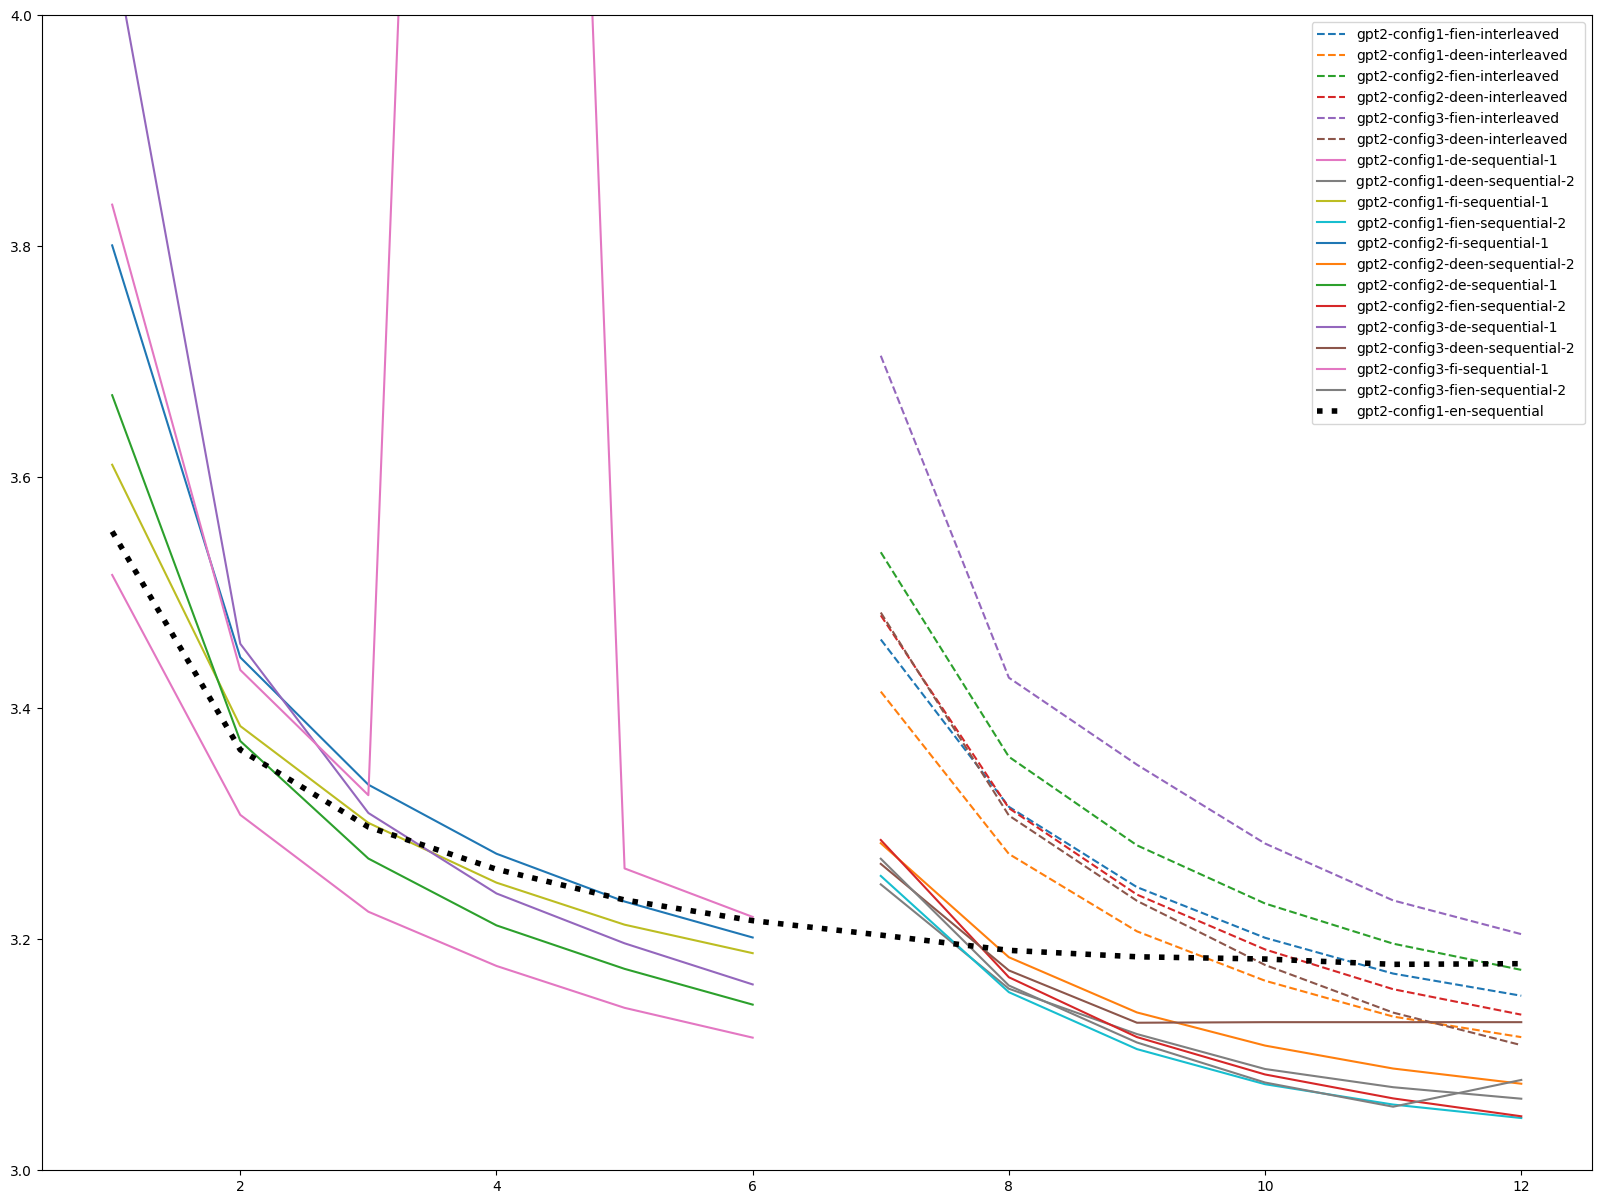

In [33]:
# Plot the data

x = [1,2,3,4,5,6,7,8,9,10,11,12]

plt.figure(figsize=(20,15))

for column in eval_losses.columns[1:7]:
    plt.plot(x, eval_losses[column], linestyle = 'dashed', label = column)

for column in eval_losses.columns[7:-1]:
    plt.plot(x, eval_losses[column], label = column)
    

plt.plot(x, eval_losses[f'{model}-config1-en-sequential'], linestyle = 'dotted', linewidth=4, color = 'black', label = f'{model}-config1-en-sequential')

plt.ylim((3,4))
plt.legend()
plt.show()


Plots: 
* Different plots for de and fi (the only two languages)
* Same color for the config, doted line for the interleaved
* Plot only the last 6 epochs where the data is evaluated on en (plot 3 or 6 epochs for interleaved?)

['gpt2-config1-fien-interleaved', 'gpt2-config2-fien-interleaved', 'gpt2-config3-fien-interleaved', 'gpt2-config1-fien-sequential-2', 'gpt2-config2-fien-sequential-2', 'gpt2-config3-fien-sequential-2']


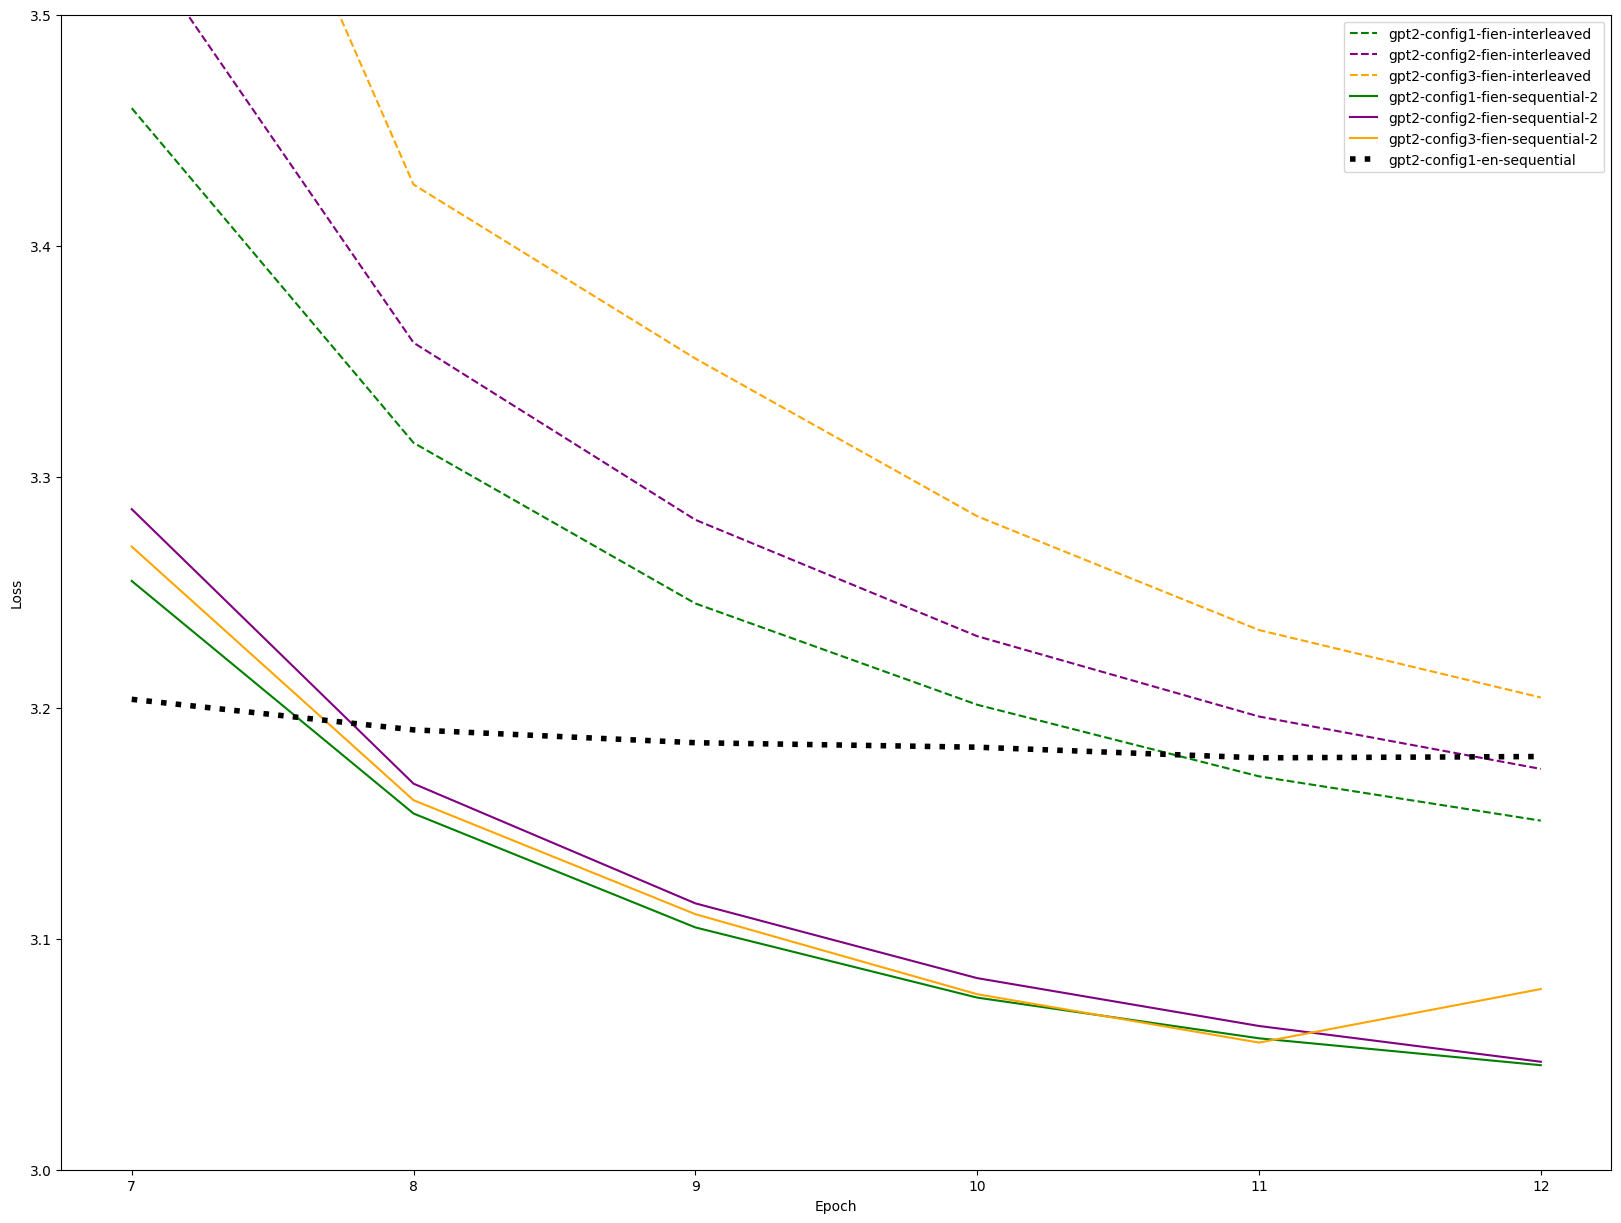

In [36]:
# Plot the data

LANG = 'fi'
columns = [c for c in eval_losses.columns[1:] if f'-{LANG}en-' in c]
print(columns)


x = [7,8,9,10,11,12]

plt.figure(figsize=(20,15))

colors = ['green', 'purple', 'orange']

for i, column in enumerate(columns[:3]):
    plt.plot(x, eval_losses[column][5:].interpolate()[1:], linestyle = 'dashed', label = column, color = colors[i])

for i, column in enumerate(columns[3:]):
    plt.plot(x, eval_losses[column][6:], label = column, color = colors[i])
    
    

plt.plot(x, eval_losses[f'{model}-config1-en-sequential'][6:], linestyle = 'dotted', linewidth=4, color = 'black', label = f'{model}-config1-en-sequential')

plt.ylim((3,3.5))

plt.legend()
plt.ylabel("Loss")
plt.xlabel("Epoch") # maybe step 

plt.show()


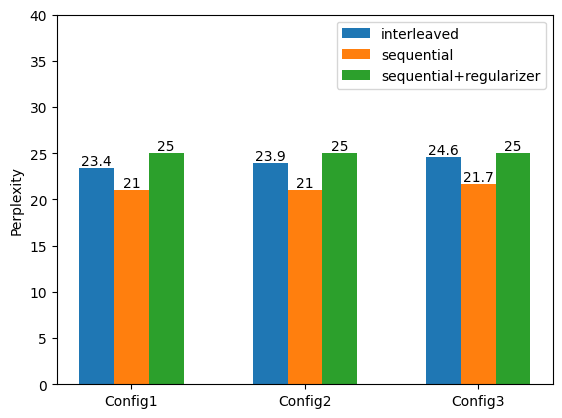

In [35]:
#Barplot of the final perplexity

x = np.arange(3)
y1 = [round(np.exp(eval_losses[c].tolist()[-1]), 1) for c in columns[:3]]
y2 = [round(np.exp(eval_losses[c].tolist()[-1]), 1) for c in columns[3:]]
y3 = [25, 25, 25]

width = 0.2

fig, ax = plt.subplots()

ax.bar(x-0.2, y1, width)
ax.bar(x, y2, width)
ax.bar(x+0.2, y3, width)

for bars in ax.containers:
    ax.bar_label(bars)

ax.set_xticks(x, ['Config1', 'Config2', 'Config3'])
#ax.set_xlabel("Model sizes")

ax.set_ylabel("Perplexity")
ax.set_ylim(0, 40)

plt.legend(["interleaved", "sequential", "sequential+regularizer"])

plt.show()